## Exercises P181

The standard error of an estimate is the standard deviation of the sampling distribution of an estimate.
In previous chapters, we saw that our estimate of the mean of a population changed depending on
the sample that we took from the population. If we repeatedly sampled from the population and each
time estimated the mean, the collection of mean estimates would form the sampling distribution of
the estimate. When we took the standard deviation of those estimates, that was the standard error
of our mean estimate.

In the case of a linear model written as:

$$Y_i = \beta_0 + \beta_1X_i + \epsilon_i, i = 1, \cdots , n$$

Q1: We have shown how to find the least squares estimates with matrix algebra. These estimates are random variables as they are linear combinations of the data. For these estimates to be
useful, we also need to compute the standard errors. Here we review standard errors in the
context of linear models. To see this, we can run a Monte Carlo simulation to imitate the
collection of falling object data. Specifically, we will generate the data repeatedly and compute
the estimate for the quadratic term each time.

In [1]:
g = 9.8
h0 = 56.67
v0 = 0 
n = 25
tt = seq(0,3.4,len=n)
y = h0 + v0 *tt - 0.5* g*tt^2 + rnorm(n,sd=1)

Now we act as if we didn’t know $h0, v0$ and -0.5*g and use regression to estimate these. 

We can rewrite the model as $y = \beta_0 + \beta_1t + \beta_2t^2 + \epsilon$ and obtain the LSE we have used in this class.
Note that g = -2 $β2$.
To obtain the LSE in R we could write:

In [2]:
X = cbind(1,tt,tt^2) 
A = solve(crossprod(X))%*%t(X)

Given how we have defined A, which of the following is the LSE of g, the acceleration due to
gravity? Hint: try the code in R.

• A) 9.8

• B) A %*% y

• C) -2 * (A %*% y) [3]

• D) A[3,3]

In [3]:
A %*% y

,56.50182220
tt,0.03226073
,-4.86424586


In [4]:
-2 * (A %*% y) [3]

[1] 9.728492

In [5]:
A[3,3]

0.04443879

C

Q2: In the lines of code above, the function rnorm introduced randomness. This means that each
time the lines of code above are repeated, the estimate of g will be different.
Use the code above in conjunction with the function replicate to generate 100,000 Monte
Carlo simulated datasets. For each dataset, compute an estimate of g. (Remember to multiply
by -2.)
What is the standard error of this estimate?

In [18]:
set.seed(123)
return = replicate(100000, {
  y = h0 + v0 *tt - 0.5* g*tt^2 + rnorm(n,sd=1)
  Y = matrix(y,nrow=length(y), ncol = 1)
  bh = solve(crossprod(X)) %*% t(X) %*%Y
  be = bh[[3]] * -2
  return(be)
})
sd(return)

[1] 0.4307565

Q3: In the father and son height examples, we have randomness because we have a random
sample of father and son pairs. For the sake of illustration, let’s assume that this is the entire
population:

In [19]:
library(UsingR)
x = father.son$fheight
y = father.son$sheight
n = length(y)

Loading required package: MASS

Loading required package: HistData

Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: 'Hmisc'


The following objects are masked from 'package:base':

    format.pval, units



Attaching package: 'UsingR'


The following object is masked from 'package:survival':

    cancer




Now let’s run a Monte Carlo simulation in which we take a sample of size 50 over and over
again. Here is how we obtain one sample:

In [20]:
N = 50
index = sample(n,N)
sampledat = father.son[index,]
x = sampledat$fheight
y = sampledat$sheight
betahat = lm(y~x)$coef

Use the function replicate to take 10,000 samples.
What is the standard error of the slope estimate? That is, calculate the standard deviation of
the estimate from the observed values obtained from many random samples.

In [22]:
return = replicate(10000, {
index = sample(n,N)
sampledat = father.son[index,]
x = sampledat$fheight
y = sampledat$sheight
betahat = lm(y~x)$coef
  return(betahat[[2]])
})
sd(return)

[1] 0.1233647

Q4: Later in this chapter we will introduce a new concept: covariance. The covariance of two lists
of numbers $X = x_1, \cdots, x_n and Y = y_1, \cdots, y_n$ is:

In [23]:
n <- 100
Y <- rnorm(n)
X <- rnorm(n)
mean( (Y - mean(Y))*(X-mean(X) ) )

[1] -0.06529407

Which of the following is closest to the covariance between father heights and son heights?

• A) 0

• B) -4

• C) 4

• D) 0.5

A

## The Design Matrix

Choice of design

In [24]:
group <- factor( c(1,1,2,2) )
model.matrix(~ group)

,(Intercept),group2
1,1,0
2,1,0
3,1,1
4,1,1


In [26]:
model.matrix(formula(~ group))

,(Intercept),group2
1,1,0
2,1,0
3,1,1
4,1,1


In [27]:
group <- c(1,1,2,2)
model.matrix(~ group)

,(Intercept),group
1,1,1
2,1,1
3,1,2
4,1,2


In [28]:
group <- factor(c("control","control","highfat","highfat"))
model.matrix(~ group)

,(Intercept),grouphighfat
1,1,0
2,1,0
3,1,1
4,1,1


### More groups

In [29]:
group <- factor(c(1,1,2,2,3,3))
model.matrix(~ group)

,(Intercept),group2,group3
1,1,0,0
2,1,0,0
3,1,1,0
4,1,1,0
5,1,0,1
6,1,0,1


In [30]:
group <- factor(c(1,1,2,2,3,3))
model.matrix(~ group + 0)

,group1,group2,group3
1,1,0,0
2,1,0,0
3,0,1,0
4,0,1,0
5,0,0,1
6,0,0,1


### More variables

In [31]:
diet <- factor(c(1,1,1,1,2,2,2,2))
sex <- factor(c("f","f","m","m","f","f","m","m"))
table(diet,sex)

    sex
diet f m
   1 2 2
   2 2 2

$$Y_i = \beta_0 + \beta_1x_{i,1} + \beta_2x_i^2 + \epsilon_i$$

In [32]:
diet <- factor(c(1,1,1,1,2,2,2,2))
sex <- factor(c("f","f","m","m","f","f","m","m"))
model.matrix(~ diet + sex)

,(Intercept),diet2,sexm
1,1,0,0
2,1,0,0
3,1,0,1
4,1,0,1
5,1,1,0
6,1,1,0
7,1,1,1
8,1,1,1


In [33]:
model.matrix(~ diet + sex + diet:sex)

,(Intercept),diet2,sexm,diet2:sexm
1,1,0,0,0
2,1,0,0,0
3,1,0,1,0
4,1,0,1,0
5,1,1,0,0
6,1,1,0,0
7,1,1,1,1
8,1,1,1,1


In [34]:
model.matrix(~ diet*sex)

,(Intercept),diet2,sexm,diet2:sexm
1,1,0,0,0
2,1,0,0,0
3,1,0,1,0
4,1,0,1,0
5,1,1,0,0
6,1,1,0,0
7,1,1,1,1
8,1,1,1,1


### Releveling

In [35]:
group <- factor(c(1,1,2,2))
group <- relevel(group, "2")
model.matrix(~ group)

,(Intercept),group1
1,1,1
2,1,1
3,1,0
4,1,0


In [36]:
group <- factor(group, levels=c("1","2"))
model.matrix(~ group)

,(Intercept),group2
1,1,0
2,1,0
3,1,1
4,1,1


### Where does model.matrix look for the data?

In [37]:
group <- 1:4
model.matrix(~ group, data=data.frame(group=5:8))

,(Intercept),group
1,1,5
2,1,6
3,1,7
4,1,8


### Continuous variables

In this chapter, we focus on models based on indicator values. In certain designs, however, we will
be interested in using numeric variables in the design formula, as opposed to converting them to
factors first. For example, in the falling object example, time was a continuous variable in the model
and time squared was also included:

In [38]:
tt <- seq(0,3.4,len=4)
model.matrix(~ tt + I(tt^2))

,(Intercept),tt,I(tt^2)
1,1,0.000000,0.000000
2,1,1.133333,1.284444
3,1,2.266667,5.137778
4,1,3.400000,11.560000


Suppose we have an experiment with the following design: on three different days, we perform an
experiment with two treated and two control units. We then measure some outcome Yi, and we
want to test the effect of treatment as well the effects of different days (perhaps the temperature in
the lab affects the measuring device). Assume that the true condition effect is the same for each day
(no interaction between condition and day). We then define factors in R for day and for condition.
    
condition/day A B C

treatment 2 2 2

control 2 2 2

Q1: Given the factors we have defined above and without defining any new ones, which of the
following R formula will produce a design matrix (model matrix) that lets us analyze the effect
of condition, controlling for the different days?

• A) ∼ day + condition

• B) ∼ condition ∼ day

• C) ∼ A + B + C + control + treated

• D) ∼ B + C + treated

Remember that using the ∼ and the names for the two variables we want in the model will produce
a design matrix controlling for all levels of day and all levels of condition. We do not use the levels
in the design formula.

In [39]:
day = c('A','A','B','B','C','C')
condition = c('control','treatment','control','treatment','control','treatment')

A

In [40]:
model.matrix(~day+condition)

,(Intercept),dayB,dayC,conditiontreatment
1,1,0,0,0
2,1,0,0,1
3,1,1,0,0
4,1,1,0,1
5,1,0,1,0
6,1,0,1,1


### The mouse diet example

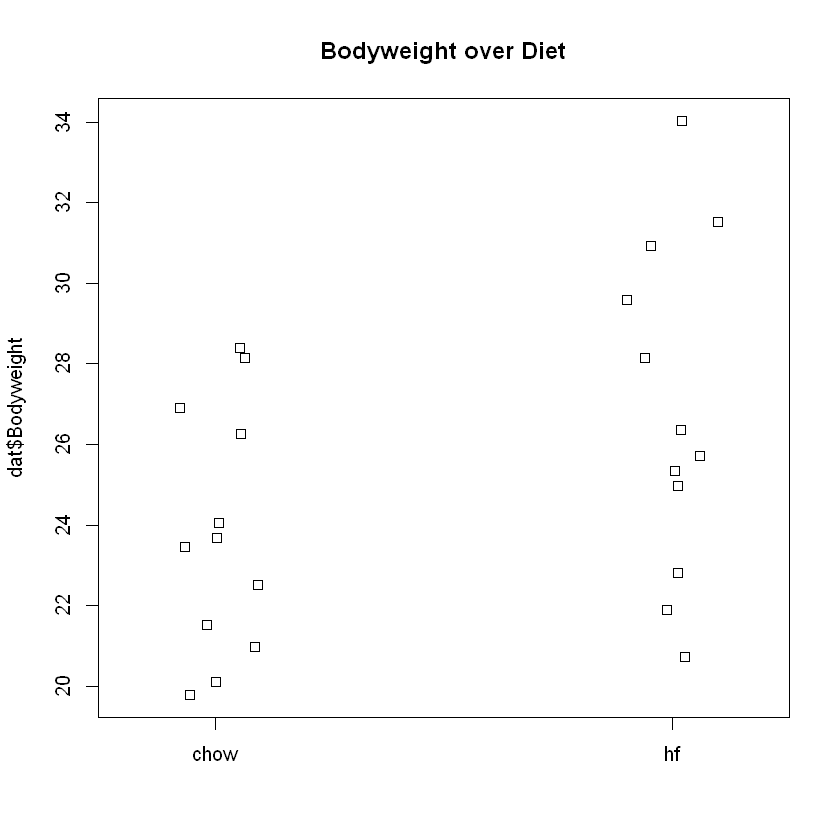

In [41]:
dat <- read.csv("D:\\desktop\\dataR\\dagdata-master\\inst\\extdata\\femaleMiceWeights.csv") ##previously downloaded
stripchart(dat$Bodyweight ~ dat$Diet, vertical=TRUE, method="jitter",
main="Bodyweight over Diet")

## The Mathematics Behind lm()

In [43]:
Y <- dat$Bodyweight
X <- model.matrix(~ Diet, data=dat)
solve(t(X) %*% X) %*% t(X) %*% Y

(Intercept),23.813333
Diethf,3.020833


In [44]:
s <- split(dat$Bodyweight, dat$Diet)
mean(s[["chow"]])

[1] 23.81333

In [45]:
mean(s[["hf"]]) - mean(s[["chow"]])

[1] 3.020833

In [46]:
fit <- lm(Bodyweight ~ Diet, data=dat)
summary(fit)


Call:
lm(formula = Bodyweight ~ Diet, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.1042 -2.4358 -0.4138  2.8335  7.1858 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   23.813      1.039  22.912   <2e-16 ***
Diethf         3.021      1.470   2.055   0.0519 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.6 on 22 degrees of freedom
Multiple R-squared:  0.1611,	Adjusted R-squared:  0.1229 
F-statistic: 4.224 on 1 and 22 DF,  p-value: 0.05192


In [47]:
(coefs <- coef(fit))

(Intercept)      Diethf 
  23.813333    3.020833

### Examining the coefficients

In [48]:
summary(fit)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),23.813333,1.039353,22.911684,7.642256e-17
Diethf,3.020833,1.469867,2.055174,5.192480e-02


In [49]:
ttest <- t.test(s[["hf"]], s[["chow"]], var.equal=TRUE)
summary(fit)$coefficients[2,3]

[1] 2.055174

In [50]:
ttest$statistic

t 
2.055174

### Exercise P198

Q1: You can make a design matrix X for a two group comparison, either using model.matrix or
simply with:

In [52]:
X <- cbind(rep(1,5 + 7),rep(c(0,1),c(5, 7)))
crossprod(X)[1,1]

[1] 12

Q2: The other entries of $X^TX$ are all the same. What is this number?

In [53]:
crossprod(X)

12,7
7,7


## Standard Errors

In [54]:
set.seed(1) 
B <- 10000
h0 <- 56.67
v0 <- 0 
g <- 9.8 ##meters per second
n <- 25
tt <- seq(0,3.4,len=n) ##time in secs, t is a base function
X <-cbind(1,tt,tt^2)
##create X'X^-1 X'
A <- solve(crossprod(X)) %*% t(X)
betahat<-replicate(B,{
y <- h0 + v0*tt - 0.5*g*tt^2 + rnorm(n,sd=1)
betahats <- A%*%y
return(betahats[3])
})
head(betahat)

[1] -5.038646 -4.894362 -5.143756 -5.220960 -5.063322 -4.777521

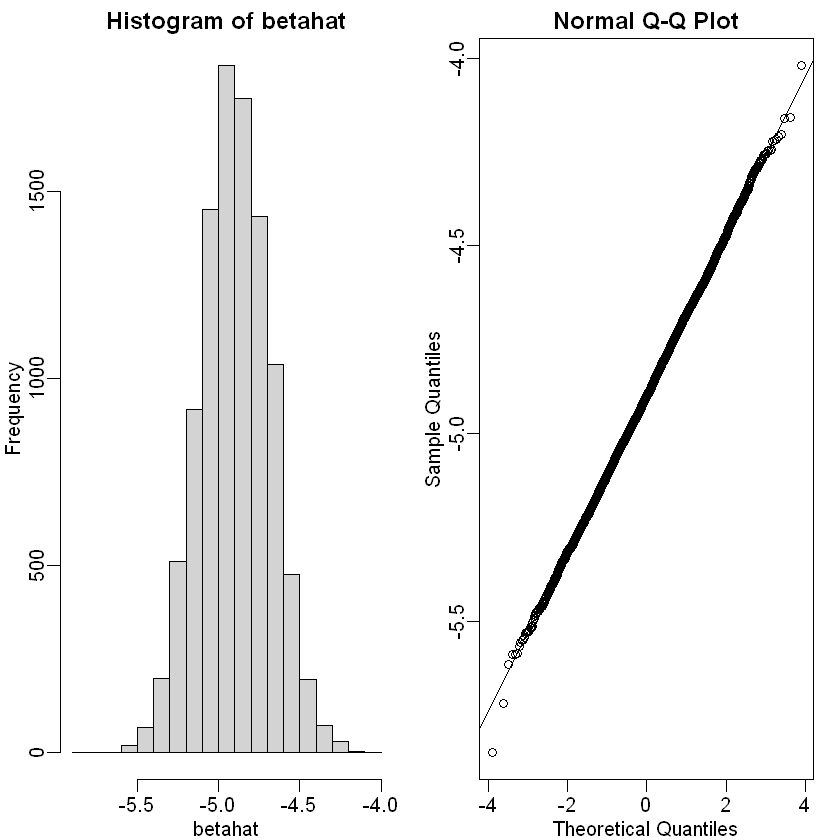

In [55]:
library(rafalib)
mypar(1,2)
hist(betahat)
qqnorm(betahat)
qqline(betahat)

In [56]:
round(mean(betahat),1)

[1] -4.9

In [57]:
sd(betahat)

[1] 0.2129976

### Father and son heights

In [58]:
x <- father.son$fheight
y <- father.son$sheight
n <- length(y)

In [59]:
N <- 50
B <-1000
betahat <- replicate(B,{
index <- sample(n,N)
sampledat <- father.son[index,]
x <- sampledat$fheight
y <- sampledat$sheight
lm(y~x)$coef
})
betahat <- t(betahat)

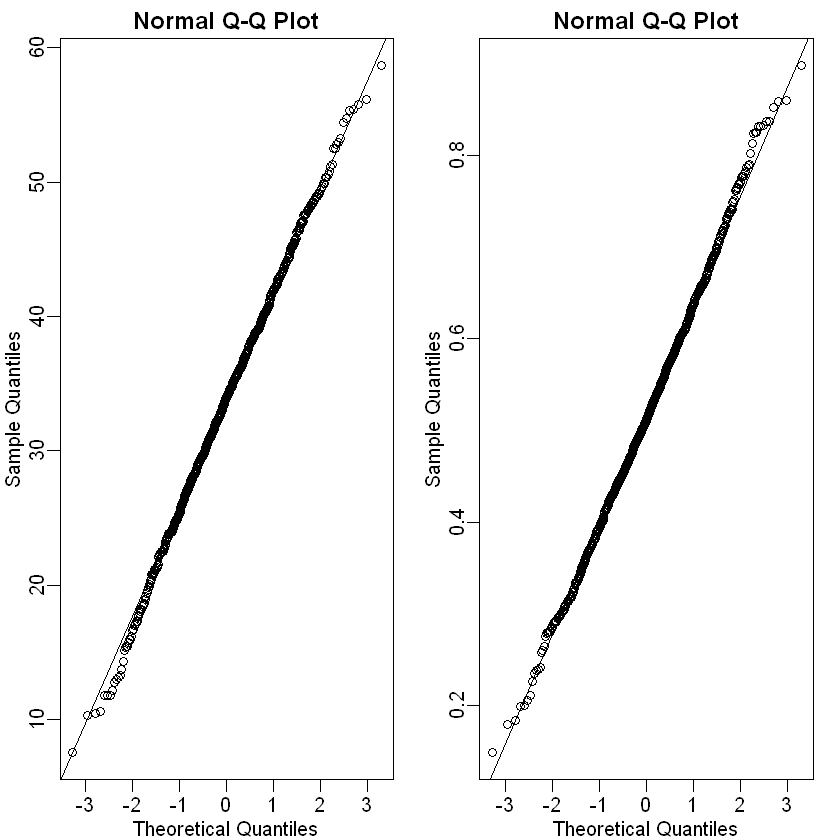

In [60]:
mypar(1,2)
qqnorm(betahat[,1])
qqline(betahat[,1])
qqnorm(betahat[,2])
qqline(betahat[,2])

In [61]:
cor(betahat[,1],betahat[,2])

[1] -0.9991099

In [62]:
mean( (betahat[,1]-mean(betahat[,1] ))* (betahat[,2]-mean(betahat[,2])))

[1] -0.9913963

### Estimating $\sigma^2$

In [63]:
n <- nrow(father.son)
N <- 50
index <- sample(n,N)
sampledat <- father.son[index,]
x <- sampledat$fheight
y <- sampledat$sheight
X <- model.matrix(~x)
N <- nrow(X)
p <- ncol(X)
XtXinv <- solve(crossprod(X))
resid <- y - X %*% XtXinv %*% crossprod(X,y)
s <- sqrt( sum(resid^2)/(N-p))
ses <- sqrt(diag(XtXinv))*s

In [64]:
summary(lm(y~x))$coef[,2]

(Intercept)           x 
  9.1642841   0.1359242

In [65]:
apply(betahat,2,sd)

(Intercept)           x 
  8.2032944   0.1210822

### Code versus math

In [66]:
x = father.son$fheight
beta = c(34,0.5)
var(beta[1]+beta[2]*x)

[1] 1.883576

In [67]:
n <- length(tt)
y <- h0 + v0*tt - 0.5*g*tt^2 + rnorm(n,sd=1)
var(y)

[1] 326.6581

### Exercises P208

In [1]:
library(UsingR)
N <- 50
set.seed(1)
a=sample(1:1078,N)
b=numeric()
sampledat=father.son[a,]
x <- sampledat$fheight
y <- sampledat$sheight
betahat <- lm(y~x)$coef

Loading required package: MASS

Loading required package: HistData

Loading required package: Hmisc

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: 'Hmisc'


The following objects are masked from 'package:base':

    format.pval, units



Attaching package: 'UsingR'


The following object is masked from 'package:survival':

    cancer




Q1: The fitted values $\hat{Y}$ from a linear model can be obtained with:

In [2]:
fit <- lm(y ~ x)
fit$fitted.values

1        2        3        4        5        6        7        8 
69.27033 68.11931 69.09869 68.52856 66.48068 68.01818 67.79780 68.20419 
       9       10       11       12       13       14       15       16 
68.04929 68.50890 67.59336 67.40100 67.71831 66.27646 68.48256 67.80804 
      17       18       19       20       21       22       23       24 
69.25742 69.11139 68.76791 67.57585 66.65584 68.72140 67.55598 69.01422 
      25       26       27       28       29       30       31       32 
68.62526 67.33597 68.92766 68.94045 66.37204 66.58197 67.63505 68.03238 
      33       34       35       36       37       38       39       40 
67.87915 69.69109 68.03458 68.47743 68.71055 67.38635 68.88510 69.01250 
      41       42       43       44       45       46       47       48 
68.61522 68.27404 69.71375 68.47982 70.01991 67.87682 68.33042 67.88145 
      49       50 
70.01590 68.81012

What is the sum of the squared residuals, where residuals are given by $r_i = Y_i − \hat{Y}_i$?

In [3]:
res = fit$residuals
res
sum(res ^ 2)

1           2           3           4           5           6 
 1.09599254 -1.66632477  0.20392914 -1.37923753  1.05292255  0.16486300 
          7           8           9          10          11          12 
-0.36075193  2.75698774  1.63371749 -2.22853470  1.00076764 -2.23791326 
         13          14          15          16          17          18 
-0.61813158 -1.43364028  2.39406499  0.93124685  1.19940261 -7.89117559 
         19          20          21          22          23          24 
-1.23698468  1.76830468 -7.86128429  0.27961973  1.65176932 -1.27324287 
         25          26          27          28          29          30 
 0.75150221 -0.78057570  0.43895208  1.37989850  0.85353502  2.77187945 
         31          32          33          34          35          36 
 3.73151554 -1.59738914  2.85083434 -3.27397939 -5.16001848  2.98415090 
         37          38          39          40          41          42 
-0.56342832  4.47939076 -3.37247738  4.16054342 -1.13445132  0.67885846 
         43          44          45          46          47          48 
 3.15640002 -2.01377260 -0.36657335  0.73590724 -2.02876296  0.71298556 
         49          50 
 2.56003700  0.09867133

[1] 331.2952

Q2: Our estimate of $\sigma^2$ will be the sum of squared residuals divided by $N−p$, the sample size minus
the number of terms in the model. Since we have a sample of 50 and 2 terms in the model (an
intercept and a slope), our estimate of $\sigma^2$ will be the sum of squared residuals divided by 48.
Use the answer from exercise 1 to provide an estimate of $\sigma^2$.

In [4]:
sum(res ^ 2)/48

[1] 6.901984

Q3: Form the design matrix X (Note: use a capital X). This can be done by combining a column of
1’s with a column containg ‘x’ , the fathers’ heights.

In [5]:
N <- 50
X <- cbind(rep(1,N), x)

Now calculate ($X^⊤X$)−1
. Use the solve function for the inverse and t for the transpose. What
is the element in the first row, first column?

In [7]:
solve(crossprod(X))[1,1]

[1] 14.5639

Q4: Now we are one step away from the standard error of $\hat{\beta}$. Take the diagonals from the ($X^⊤X$)−1
matrix above, using the diag function. Multiply our estimate of $\sigma^2$
and the diagonals of this
matrix. This is the estimated variance of $\hat{\beta}$, so take the square root of this. You should end up
with two numbers: the standard error for the intercept and the standard error for the slope.
What is the standard error for the slope?

In [10]:
sqrt(diag(solve(crossprod(X))) * sum(res ^ 2)/48)[2]

x 
0.1479065

In [11]:
summary(fit)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.8912 -1.3527  0.3593  1.5703  4.4794 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  44.3377    10.0260   4.422 5.58e-05 ***
x             0.3530     0.1479   2.387    0.021 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.627 on 48 degrees of freedom
Multiple R-squared:  0.1061,	Adjusted R-squared:  0.08747 
F-statistic: 5.697 on 1 and 48 DF,  p-value: 0.02098


## Interactions and Contrasts

In [1]:
url <- "https://raw.githubusercontent.com/genomicsclass/dagdata/master/inst/extdata/\
spider_wolff_gorb_2013.csv"
filename <- "spider_wolff_gorb_2013.csv"
library(downloader)
if (!file.exists(filename)) download(url, filename)
spider <- read.csv(filename, skip=1)

### Initial visual inspection of the data

In [2]:
table(spider$leg,spider$type)

    
     pull push
  L1   34   34
  L2   15   15
  L3   52   52
  L4   40   40

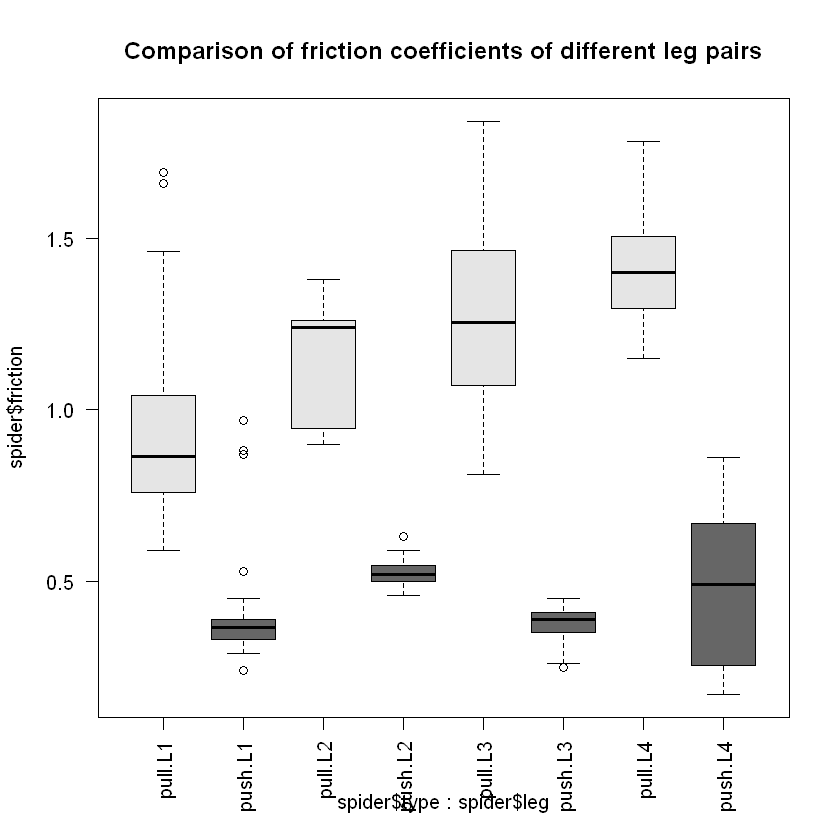

In [3]:
boxplot(spider$friction ~ spider$type * spider$leg,
col=c("grey90","grey40"), las=2,
main="Comparison of friction coefficients of different leg pairs")

### A linear model with one variable

In [4]:
spider.sub <- spider[spider$leg == "L1",]
fit <- lm(friction ~ type, data=spider.sub)
summary(fit)


Call:
lm(formula = friction ~ type, data = spider.sub)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.33147 -0.10735 -0.04941 -0.00147  0.76853 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.92147    0.03827  24.078  < 2e-16 ***
typepush    -0.51412    0.05412  -9.499  5.7e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2232 on 66 degrees of freedom
Multiple R-squared:  0.5776,	Adjusted R-squared:  0.5711 
F-statistic: 90.23 on 1 and 66 DF,  p-value: 5.698e-14


In [5]:
(coefs <- coef(fit))

(Intercept)    typepush 
  0.9214706  -0.5141176

In [6]:
s <- split(spider.sub$friction, spider.sub$type)
mean(s[["pull"]])

[1] 0.9214706

In [7]:
mean(s[["push"]]) - mean(s[["pull"]])

[1] -0.5141176

In [8]:
X <- model.matrix(~ type, data=spider.sub)
colnames(X)

[1] "(Intercept)" "typepush"

In [9]:
head(X)

,(Intercept),typepush
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0


In [10]:
tail(X)

,(Intercept),typepush
63,1,1
64,1,1
65,1,1
66,1,1
67,1,1
68,1,1


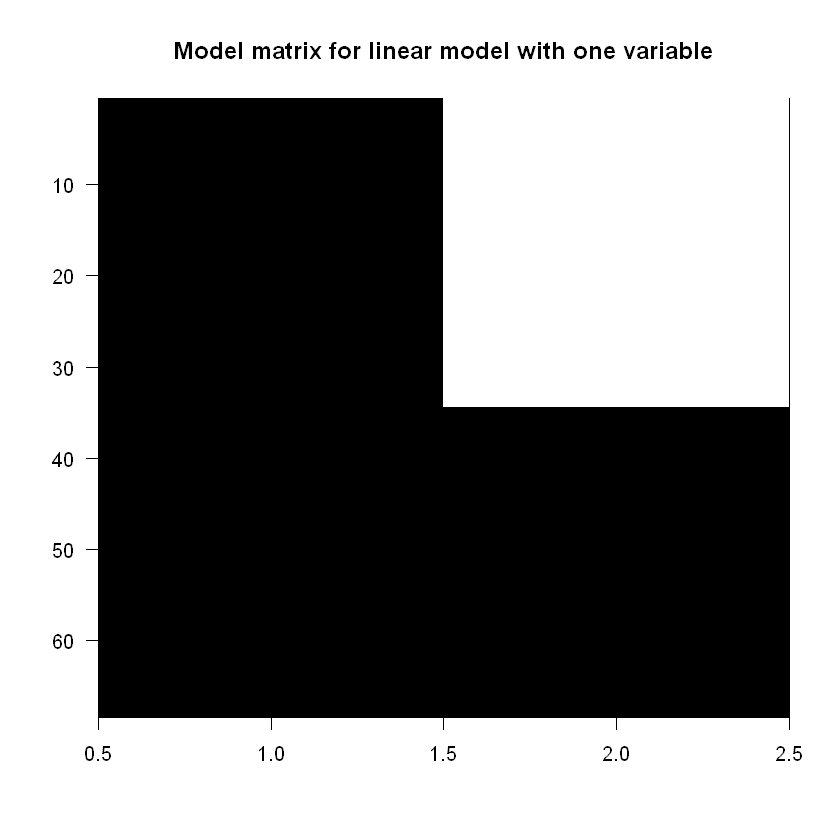

In [11]:
library(rafalib)
imagemat(X, main="Model matrix for linear model with one variable")

### A linear model with two variables

In [12]:
X <- model.matrix(~ type + leg, data=spider)
colnames(X)

[1] "(Intercept)" "typepush"    "legL2"       "legL3"       "legL4"

In [13]:
head(X)

,(Intercept),typepush,legL2,legL3,legL4
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
5,1,0,0,0,0
6,1,0,0,0,0


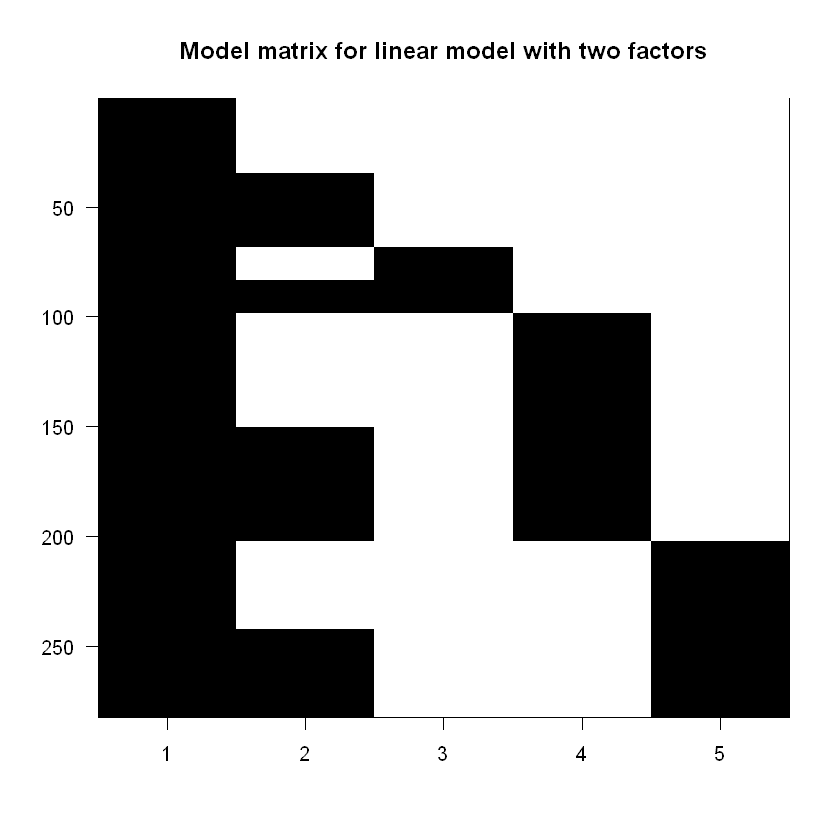

In [14]:
imagemat(X, main="Model matrix for linear model with two factors")

In [15]:
fitTL <- lm(friction ~ type + leg, data=spider)
summary(fitTL)


Call:
lm(formula = friction ~ type + leg, data = spider)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46392 -0.13441 -0.00525  0.10547  0.69509 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.05392    0.02816  37.426  < 2e-16 ***
typepush    -0.77901    0.02482 -31.380  < 2e-16 ***
legL2        0.17192    0.04569   3.763 0.000205 ***
legL3        0.16049    0.03251   4.937 1.37e-06 ***
legL4        0.28134    0.03438   8.183 1.01e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2084 on 277 degrees of freedom
Multiple R-squared:  0.7916,	Adjusted R-squared:  0.7886 
F-statistic:   263 on 4 and 277 DF,  p-value: < 2.2e-16


In [16]:
(coefs <- coef(fitTL))

(Intercept)    typepush       legL2       legL3       legL4 
  1.0539153  -0.7790071   0.1719216   0.1604921   0.2813382

### Mathematical representation

$$Y_i = \beta_0 + \beta_1x_{i,1} + \beta_2x_{i,2} + \beta_3x_{i,3} + \beta_4x_{i,4} + \epsilon_i
, i = 1, \cdots , N$$

$$\hat{\beta} = (X^⊤X)^{−1}X^⊤Y$$

In [17]:
Y <- spider$friction
X <- model.matrix(~ type + leg, data=spider)
beta.hat <- solve(t(X) %*% X) %*% t(X) %*% Y 
t(beta.hat)

(Intercept),typepush,legL2,legL3,legL4
1.053915,-0.7790071,0.1719216,0.1604921,0.2813382


In [18]:
coefs

(Intercept)    typepush       legL2       legL3       legL4 
  1.0539153  -0.7790071   0.1719216   0.1604921   0.2813382

In [22]:
s <- split(spider$friction, spider$type)

In [20]:
coefs[1]

(Intercept) 
   1.053915

In [25]:
mean(s[["pull"]])

[1] 1.211206

In [26]:
coefs[1]

(Intercept) 
   1.053915

In [27]:
mean(s[["push"]])

[1] 0.4321986

In [28]:
coefs[1] + coefs[2]

(Intercept) 
  0.2749082

### Contrasting coefficients

$$(L3 − L1) − (L2 − L1) = L3 − L2$$

In [37]:
library(contrast) #Available from CRAN
L3vsL2 <- contrast(fitTL,list(leg="L3",type="pull"),list(leg="L2",type="pull"))
L3vsL2

lm model parameter contrast

    Contrast       S.E.      Lower      Upper     t  df Pr(>|t|)
 -0.01142949 0.04319685 -0.0964653 0.07360632 -0.26 277   0.7915

In [38]:
coefs[4] - coefs[3]

legL3 
-0.01142949

In [39]:
(cT <- L3vsL2$X)

,(Intercept),typepush,legL2,legL3,legL4
1,0,0,-1,1,0


In [40]:
cT %*% coefs

1,-0.01142949


In [41]:
Sigma.hat <- sum(fitTL$residuals^2)/(nrow(X) - ncol(X)) * solve(t(X) %*% X)
signif(Sigma.hat, 2)

,(Intercept),typepush,legL2,legL3,legL4
(Intercept),0.00079,-3.1e-04,-0.00064,-0.00064,-0.00064
typepush,-0.00031,6.2e-04,0.00000,0.00000,0.00000
legL2,-0.00064,-6.4e-20,0.00210,0.00064,0.00064
legL3,-0.00064,-6.4e-20,0.00064,0.00110,0.00064
legL4,-0.00064,-1.2e-19,0.00064,0.00064,0.00120


In [42]:
sqrt(cT %*% Sigma.hat %*% t(cT))

,1
1,0.04319685


In [43]:
L3vsL2$SE

[1] 0.04319685

In [44]:
L3vsL2.equiv <- contrast(fitTL,list(leg="L3",type="push"),list(leg="L2",type="push"))
L3vsL2.equiv$X

,(Intercept),typepush,legL2,legL3,legL4
1,0,0,-1,1,0


## Linear Model with Interactions

In [45]:
X <- model.matrix(~ type + leg + type:leg, data=spider)
colnames(X)

[1] "(Intercept)"    "typepush"       "legL2"          "legL3"         
[5] "legL4"          "typepush:legL2" "typepush:legL3" "typepush:legL4"

In [46]:
head(X)

,(Intercept),typepush,legL2,legL3,legL4,typepush:legL2,typepush:legL3,typepush:legL4
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0


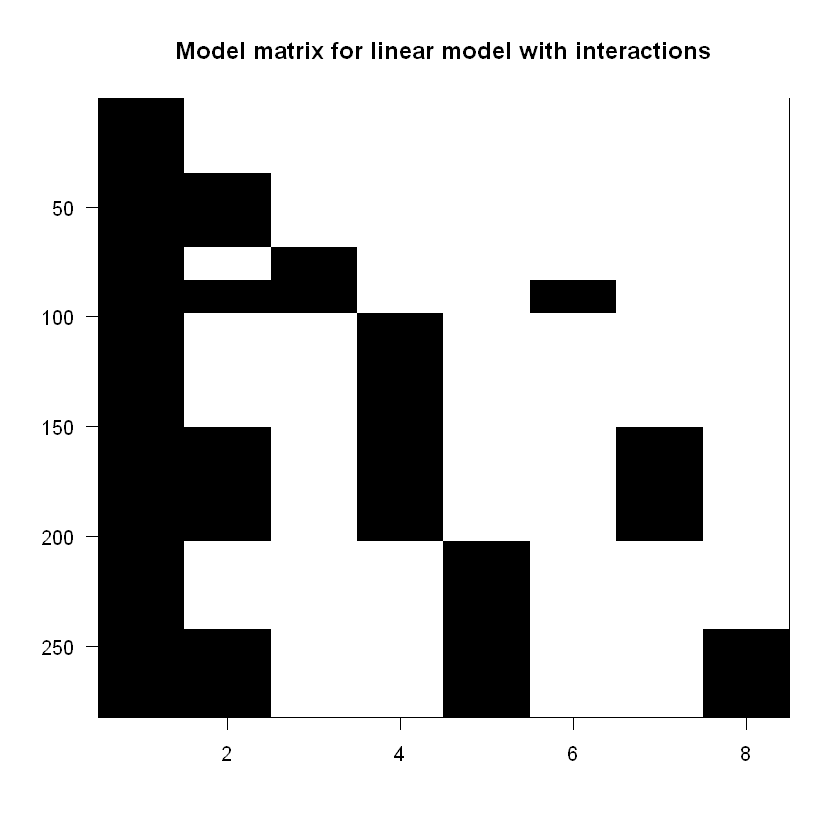

In [47]:
imagemat(X, main="Model matrix for linear model with interactions")

In [48]:
fitX <- lm(friction ~ type + leg + type:leg, data=spider)
summary(fitX)


Call:
lm(formula = friction ~ type + leg + type:leg, data = spider)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46385 -0.10735 -0.01111  0.07848  0.76853 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.92147    0.03266  28.215  < 2e-16 ***
typepush       -0.51412    0.04619 -11.131  < 2e-16 ***
legL2           0.22386    0.05903   3.792 0.000184 ***
legL3           0.35238    0.04200   8.390 2.62e-15 ***
legL4           0.47928    0.04442  10.789  < 2e-16 ***
typepush:legL2 -0.10388    0.08348  -1.244 0.214409    
typepush:legL3 -0.38377    0.05940  -6.461 4.73e-10 ***
typepush:legL4 -0.39588    0.06282  -6.302 1.17e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1904 on 274 degrees of freedom
Multiple R-squared:  0.8279,	Adjusted R-squared:  0.8235 
F-statistic: 188.3 on 7 and 274 DF,  p-value: < 2.2e-16


In [49]:
coefs <- coef(fitX)

### Contrasts

In [50]:
library(contrast) ##Available from CRAN
L2push.vs.pull <- contrast(fitX,
list(leg="L2", type = "push"),
list(leg="L2", type = "pull"))
L2push.vs.pull

lm model parameter contrast

 Contrast      S.E.      Lower      Upper     t  df Pr(>|t|)
   -0.618 0.0695372 -0.7548951 -0.4811049 -8.89 274        0

In [51]:
coefs[2] + coefs[6]

typepush 
  -0.618

### Differences of differences

In [52]:
library(multcomp) ##Available from CRAN
C <- matrix(c(0,0,0,0,0,-1,1,0), 1)
L3vsL2interaction <- glht(fitX, linfct=C)
summary(L3vsL2interaction)

Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: 'TH.data'


The following object is masked from 'package:MASS':

    geyser





	 Simultaneous Tests for General Linear Hypotheses

Fit: lm(formula = friction ~ type + leg + type:leg, data = spider)

Linear Hypotheses:
       Estimate Std. Error t value Pr(>|t|)    
1 == 0 -0.27988    0.07893  -3.546  0.00046 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)


In [53]:
coefs[7] - coefs[6]

typepush:legL3 
    -0.2798846

## Analysis of variance

In [54]:
anova(fitX)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
type,1,42.783070,42.78306950,1179.71276,2.753680e-101
leg,3,2.920856,0.97361860,26.84684,2.971903e-15
type:leg,3,2.097865,0.69928836,19.28238,2.255560e-11
Residuals,274,9.936793,0.03626567,NA,NA


In [55]:
mu0 <- mean(spider$friction)
(initial.ss <- sum((spider$friction - mu0)^2))

[1] 57.73858

In [56]:
N <- nrow(spider)
(N - 1) * var(spider$friction)

[1] 57.73858

In [57]:
s <- split(spider$friction, spider$type)
after.type.ss <- sum( sapply(s, function(x) {
residual <- x - mean(x)
sum(residual^2)
}) )
(type.ss <- initial.ss - after.type.ss)

[1] 42.78307

In [58]:
sum(sapply(s, length) * (sapply(s, mean) - mu0)^2)

[1] 42.78307

### A different specification of the same model

In [2]:
spider$group <- factor(paste0(spider$leg, spider$type))
X <- model.matrix(~ 0 + group, data=spider)
colnames(X)

[1] "groupL1pull" "groupL1push" "groupL2pull" "groupL2push" "groupL3pull"
[6] "groupL3push" "groupL4pull" "groupL4push"

In [3]:
head(X)

,groupL1pull,groupL1push,groupL2pull,groupL2push,groupL3pull,groupL3push,groupL4pull,groupL4push
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0


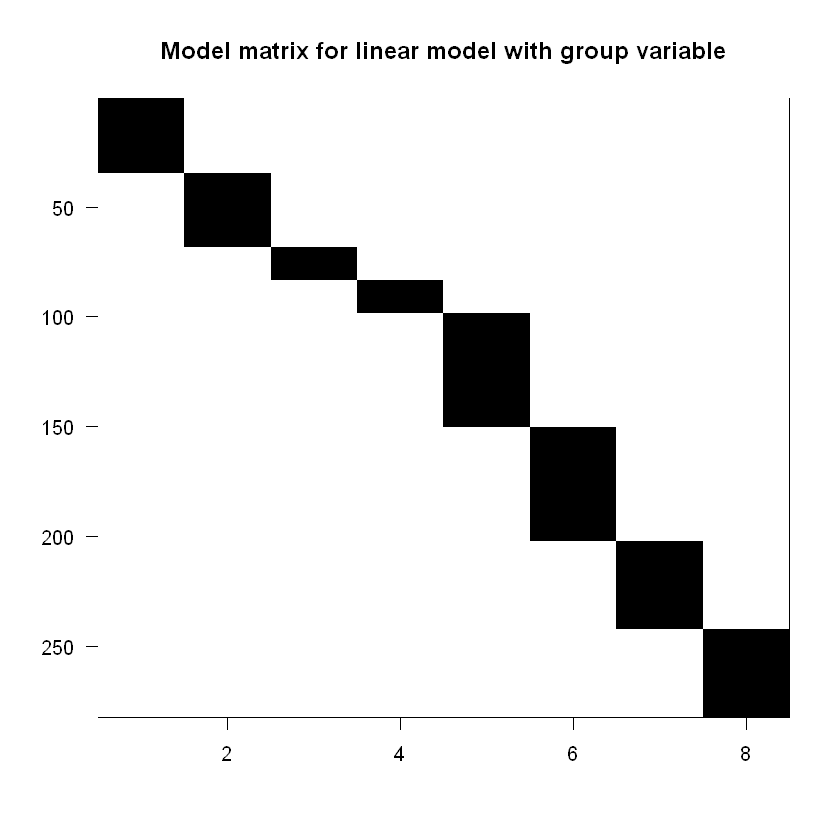

In [5]:
library(rafalib)
imagemat(X, main="Model matrix for linear model with group variable")

In [6]:
fitG <- lm(friction ~ 0 + group, data=spider)
summary(fitG)


Call:
lm(formula = friction ~ 0 + group, data = spider)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46385 -0.10735 -0.01111  0.07848  0.76853 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
groupL1pull  0.92147    0.03266   28.21   <2e-16 ***
groupL1push  0.40735    0.03266   12.47   <2e-16 ***
groupL2pull  1.14533    0.04917   23.29   <2e-16 ***
groupL2push  0.52733    0.04917   10.72   <2e-16 ***
groupL3pull  1.27385    0.02641   48.24   <2e-16 ***
groupL3push  0.37596    0.02641   14.24   <2e-16 ***
groupL4pull  1.40075    0.03011   46.52   <2e-16 ***
groupL4push  0.49075    0.03011   16.30   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1904 on 274 degrees of freedom
Multiple R-squared:   0.96,	Adjusted R-squared:  0.9588 
F-statistic:   821 on 8 and 274 DF,  p-value: < 2.2e-16


In [7]:
coefs <- coef(fitG)

### Simple contrasts using the contrast package

In [9]:
library(contrast)
groupL2push.vs.pull <- contrast(fitG,
list(group = "L2push"),
list(group = "L2pull"))
groupL2push.vs.pull

lm model parameter contrast

  Contrast      S.E.      Lower      Upper     t  df Pr(>|t|)
1   -0.618 0.0695372 -0.7548951 -0.4811049 -8.89 274        0

In [10]:
coefs[4] - coefs[3]

groupL2push 
     -0.618

### Differences of differences when there is no intercept

In [12]:
library(multcomp)
C <- matrix(c(0,0,1,-1,-1,1,0,0), 1)
groupL3vsL2interaction <- glht(fitG, linfct=C)
summary(groupL3vsL2interaction)

Loading required package: mvtnorm

Loading required package: survival

Loading required package: TH.data

Loading required package: MASS


Attaching package: 'TH.data'


The following object is masked from 'package:MASS':

    geyser





	 Simultaneous Tests for General Linear Hypotheses

Fit: lm(formula = friction ~ 0 + group, data = spider)

Linear Hypotheses:
       Estimate Std. Error t value Pr(>|t|)    
1 == 0 -0.27988    0.07893  -3.546  0.00046 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)


In [13]:
names(coefs)

[1] "groupL1pull" "groupL1push" "groupL2pull" "groupL2push" "groupL3pull"
[6] "groupL3push" "groupL4pull" "groupL4push"

In [14]:
(coefs[6] - coefs[5]) - (coefs[4] - coefs[3])

groupL3push 
 -0.2798846

### Exercises P241

Suppose we have an experiment with two species A and B, and two conditions, control and treated

In [2]:
species <- factor(c("A","A","B","B"))
condition <- factor(c("control","treated","control","treated"))

In [3]:
model.matrix(~ species + condition)

,(Intercept),speciesB,conditiontreated
1,1,0,0
2,1,0,1
3,1,1,0
4,1,1,1


Q1:Suppose we want to build a contrast of coefficients for the above experimental design.
You can either figure this question out by looking at the design matrix, or by using the contrast
function from the contrast library with random numbers for y. The contrast vector will be
returned as contrast(...)$X.
What should the contrast vector be, to obtain the difference between the species B control
group and the species A treatment group (species B control - species A treatment)? Assume
that the coefficients (columns of design matrix) are: Intercept, speciesB, conditiontreated.

• A) 0 0 1

• B) 0 -1 0

• C) 0 1 1

• D) 0 1 -1

• E) 0 -1 1

• F) 1 0 1

In [4]:
model=lm(rnorm(4) ~ species + condition)
table(species,condition)

       condition
species control treated
      A       1       1
      B       1       1

In [5]:
a=contrast(model, list(species ='B',condition='control'),
         list(species ='A',condition='treated'))
a$X

ERROR: Error in contrast(model, list(species = "B", condition = "control"), list(species = "A", : could not find function "contrast"


D

Q2: Use the Rmd script to load the spider dataset. Suppose we build a model using two variables:
∼ type + leg.

What is the t-statistic for the contrast of leg pair L4 vs. leg pair L2?

In [12]:
library(contrast)
model1=lm(friction~type+leg, data = spider)
res=contrast(model1, list(leg ='L4',type = 'pull'),
         list(leg = 'L2',type='pull'))
res$testStat

1 
2.451974

Q3: The t-statistic for the contrast of leg pair L4 vs. leg pair L2 is constructed by taking the
difference of the estimated coefficients legL4 and legL2, and then dividing by the standard
error of the difference.

In [7]:
X <- model.matrix(~ type + leg, data=spider)
C <- matrix(c(0,0,-1,0,1),1,5)
Sigma.hat <- sum(model1$residuals^2)/(nrow(X)-ncol(X)) *
  solve(t(X)%*%X) # covariance matrix
Sigma.hat

,(Intercept),typepush,legL2,legL3,legL4
(Intercept),0.0007929832,-3.081306e-04,-0.0006389179,-0.0006389179,-0.0006389179
typepush,-0.0003081306,6.162612e-04,0.0000000000,0.0000000000,0.0000000000
legL2,-0.0006389179,-6.439411e-20,0.0020871318,0.0006389179,0.0006389179
legL3,-0.0006389179,-6.439411e-20,0.0006389179,0.0010566719,0.0006389179
legL4,-0.0006389179,-1.191291e-19,0.0006389179,0.0006389179,0.0011819981


0.0006389179

Q4: Suppose that we notice that the within-group variances for the groups with smaller frictional
coefficients are generally smaller, and so we try to apply a transformation to the frictional
coefficients to make the within-group variances more constant.
Add a new variable log2friction to the spider dataframe:

In [8]:
spider$log2friction <- log2(spider$friction)

The Y values now look like:

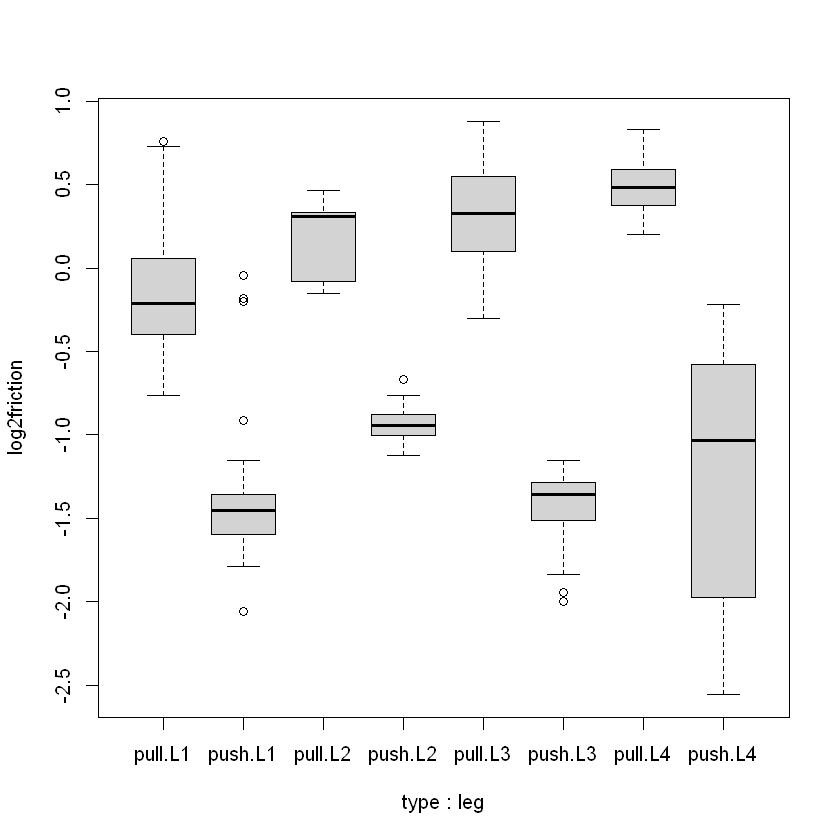

In [9]:
boxplot(log2friction ~ type*leg, data=spider)

Run a linear model of log2friction with type, leg and interactions between type and leg.
What is the t-statistic for the interaction of type push and leg L4? If this t-statistic is sufficiently
large, we would reject the null hypothesis that the push vs. pull effect on log2(friction) is
the same in L4 as in L1.

In [10]:
model2=lm(log2friction~type+leg+type:leg, data = spider)
summary(model2)[[4]]

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.1682816,0.06613097,-2.5446712,1.148701e-02
typepush,-1.2065650,0.09352331,-12.9012220,4.472641e-30
legL2,0.3468125,0.11952459,2.9015992,4.014075e-03
legL3,0.4899946,0.08504571,5.7615441,2.237221e-08
legL4,0.6466753,0.08994784,7.1894475,6.199475e-12
typepush:legL2,0.0996718,0.16903330,0.5896578,5.559060e-01
typepush:legL3,-0.5407473,0.12027280,-4.4960067,1.023073e-05
typepush:legL4,-0.4692035,0.12720545,-3.6885485,2.719589e-04


Q5: Using the same analysis of log2 transformed data, What is the F-value for all of the type:leg
interaction terms in an ANOVA? If this value is sufficiently large, we would reject the null
hypothesis that the push vs. pull effect on log2(friction) is the same for all leg pairs.

In [11]:
anova(model2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
type,1,164.708608,164.7086082,1107.71403,2.916175e-98
leg,3,7.064894,2.3549647,15.83783,1.589102e-09
type:leg,3,4.773668,1.5912227,10.70144,1.129577e-06
Residuals,274,40.741705,0.1486924,NA,NA


Q6: What is the L2 vs. L1 estimate in log2(friction) for the pull samples?

In [13]:
contrast(model2, list(leg ='L2',type = 'pull'),
         list(leg = 'L1',type='pull'))

lm model parameter contrast

  Contrast      S.E.     Lower     Upper   t  df Pr(>|t|)
 0.3468125 0.1195246 0.1115092 0.5821157 2.9 274    0.004

Q7:What is the L2 vs. L1 estimate in log2(friction) for the push samples? Remember, because
of the interaction terms, this is not the same as the L2 vs L1 difference for the pull samples.
If you’re not sure use the contrast function. Another hint: consider the arrows plot for the
model with interactions.

In [14]:
contrast(model2, list(leg ='L2',type = 'push'),
         list(leg = 'L1',type='push'))

lm model parameter contrast

  Contrast      S.E.    Lower     Upper    t  df Pr(>|t|)
 0.4464843 0.1195246 0.211181 0.6817875 3.74 274    2e-04

## Rank

In [15]:
Sex <- c(0,0,0,0,1,1,1,1) 
A <- c(1,1,0,0,0,0,0,0) 
B <- c(0,0,1,1,0,0,0,0) 
C <- c(0,0,0,0,1,1,0,0) 
D <- c(0,0,0,0,0,0,1,1) 
X <- model.matrix(~Sex+A+B+C+D-1)
cat("ncol=",ncol(X),"rank=", qr(X)$rank,"\n")

ncol= 5 rank= 4 


## Removing Confounding

In [16]:
Sex <- c(0,1,0,1,0,1,0,1) 
A <- c(1,1,0,0,0,0,0,0) 
B <- c(0,0,1,1,0,0,0,0) 
C <- c(0,0,0,0,1,1,0,0) 
D <- c(0,0,0,0,0,0,1,1) 
X <- model.matrix(~Sex+A+B+C+D-1)
cat("ncol=",ncol(X),"rank=", qr(X)$rank,"\n")

ncol= 5 rank= 5 


Q1: Which of the above design matrices does NOT have the problem of collinearity?

E

Q2: The following exercises are advanced. Let’s use the example from the lecture to visualize how
there is not a single best βˆ, when the design matrix has collinearity of columns. An example
can be made with:

In [17]:
sex <- factor(rep(c("female","male"),each=4))
trt <- factor(c("A","A","B","B","C","C","D","D"))

The model matrix can then be formed with:

In [18]:
X <- model.matrix( ~ sex + trt)

And we can see that the number of independent columns is less than the number of columns
of X:

In [20]:
qr(X)$rank

[1] 4

Suppose we observe some outcome Y. For simplicity, we will use synthetic data:

In [21]:
Y <- 1:8

In [22]:
makeYstar <- function(a,b) Y - X[,2] * a - X[,5] * b

Now we’ll construct a function which, for a given value a and b, gives us back the sum of
squared residuals after fitting the other terms.

In [23]:
fitTheRest <- function(a,b) {
Ystar <- makeYstar(a,b)
Xrest <- X[,-c(2,5)]
betarest <- solve(t(Xrest) %*% Xrest) %*% t(Xrest) %*% Ystar
residuals <- Ystar - Xrest %*% betarest
sum(residuals^2) }

What is the sum of squared residuals when the male coefficient is 1 and the D coefficient is 2,
and the other coefficients are fit using the linear model solution?

In [24]:
fitTheRest(1,2)

[1] 11

Q3: We can apply our function fitTheRest to a grid of values for βmale and βD, using the outer
function in R. outer takes three arguments: a grid of values for the first argument, a grid of
values for the second argument, and finally a function which takes two arguments.
Try it out:

In [26]:
outer(1:3,1:3,`*`)

1,2,3
2,4,6
3,6,9


We can run fitTheRest on a grid of values, using the following code (the Vectorize is
necessary as outer requires only vectorized functions):

In [27]:
outer(-2:8,-2:8,Vectorize(fitTheRest))

102,83,66,51,38,27,18,11,6,3,2
83,66,51,38,27,18,11,6,3,2,3
66,51,38,27,18,11,6,3,2,3,6
51,38,27,18,11,6,3,2,3,6,11
38,27,18,11,6,3,2,3,6,11,18
27,18,11,6,3,2,3,6,11,18,27
18,11,6,3,2,3,6,11,18,27,38
11,6,3,2,3,6,11,18,27,38,51
6,3,2,3,6,11,18,27,38,51,66
3,2,3,6,11,18,27,38,51,66,83
2,3,6,11,18,27,38,51,66,83,102


In the grid of values, what is the smallest sum of squared residuals?

In [28]:
b=outer(-2:8,-2:8,Vectorize(fitTheRest))
unique(b[which(b == min(b))])

[1] 2

## The QR Factorization (Advanced)

### solve is numerically unstable

In [30]:
n <- 50;M <- 500
x <- seq(1,M,len=n)
X <- cbind(1,x,x^2,x^3)
colnames(X) <- c("Intercept","x","x2","x3")
beta <- matrix(c(1,1,1,1),4,1)
set.seed(1) 
y <- X%*%beta+rnorm(n,sd=1)

In [31]:
solve(crossprod(X)) %*% crossprod(X,y)

ERROR: Error in solve.default(crossprod(X)): system is computationally singular: reciprocal condition number = 2.93617e-17


In [32]:
options(digits=4)
log10(crossprod(X))

,Intercept,x,x2,x3
Intercept,1.699,4.098,6.625,9.203
x,4.098,6.625,9.203,11.810
x2,6.625,9.203,11.810,14.434
x3,9.203,11.810,14.434,17.070


### Finding LSE with QR

In [33]:
QR <- qr(X)
Q <- qr.Q( QR )
R <- qr.R( QR )
(betahat <- backsolve(R, crossprod(Q,y) ) )

0.9038
1.0066
1.0000
1.0000


In [34]:
QR <- qr(X)
(betahat <- solve.qr(QR, y))

Intercept,0.9038
x,1.0066
x2,1.0000
x3,1.0000


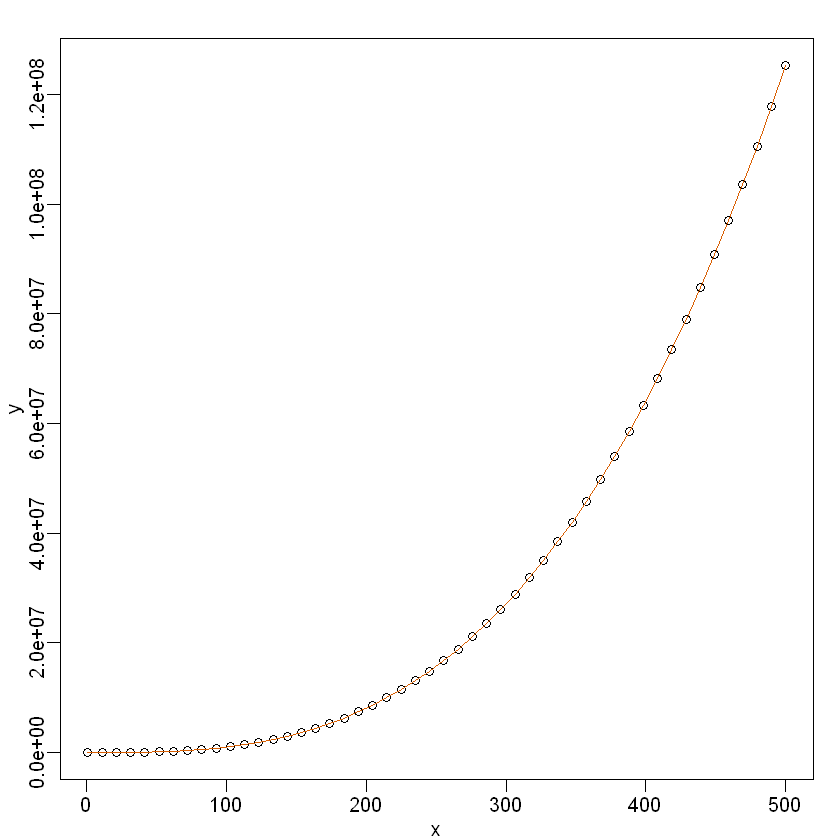

In [35]:
library(rafalib)
mypar(1,1)
plot(x,y)
fitted <- tcrossprod(Q)%*%y
lines(x,fitted,col=2)

### Standard errors

In [36]:
df <- length(y) - QR$rank
sigma2 <- sum((y-fitted)^2)/df
varbeta <- sigma2*chol2inv(qr.R(QR))
SE <- sqrt(diag(varbeta))
cbind(betahat,SE)

,,SE
Intercept,0.9038,4.508e-01
x,1.0066,7.858e-03
x2,1.0000,3.662e-05
x3,1.0000,4.802e-08


In [37]:
summary(lm(y~0+X))$coef

,Estimate,Std. Error,t value,Pr(>|t|)
XIntercept,0.9038,4.508e-01,2.005e+00,5.089e-02
Xx,1.0066,7.858e-03,1.281e+02,2.171e-60
Xx2,1.0000,3.662e-05,2.731e+04,1.745e-167
Xx3,1.0000,4.802e-08,2.082e+07,4.559e-300
